# Fare exploration

We first need to readjust Fare based on how many people are on a single ticket.

Then we need to see 

 + how fare is correlated with survival
 + how we can forge a new simpler and more relevant Fare feature
 + if there are missing values we might need to complete

## 1. Adjusting ticket based on number of people

We have a problem here, since people are broken out between train and test.
We will thus performed compuations on joined data

In [1]:
library(here)
setwd(here())
print(getwd())

library(gridExtra)
library(lattice)


source(file="misc_functions.R")
source("experiments/titanic_challenge/1_feature_engineering.R")

train.raw <- read.csv("datasets/titanic_na/train.csv")
test.raw <- read.csv("datasets/titanic_na/test.csv")

train.ff <- fe$forge_features(train.raw)


all.tickets <- c(as.character(train.raw$Ticket), as.character(test.raw$Tickets))

real_fare <- function(ticket, fare) {
    nb <- sum(all.tickets == ticket)
    real_fare <- fare / nb
    return(real_fare)
}


train.raw$Survived <- as.factor(train.raw$Survived)
cols.notna <-  (!is.na(train.raw$Age))
train.notna <- train.raw[cols.notna,]

train.notna$Pclass <- as.factor(train.raw$Pclass[cols.notna])
train.notna$Title <- train.ff$Title[cols.notna]
train.notna$Age <- train.ff$Age[cols.notna]
train.notna$Age.simple <- train.ff$Age.simple[cols.notna]
train.notna$Age.disc5 <- train.ff$Age.disc5[cols.notna]

here() starts at /home/sapristi/Documents/ML


[1] "/home/sapristi/Documents/ML"


In [3]:
train.notna$Fare.new <- mapply(real_fare, train.notna$Ticket, train.notna$Fare)

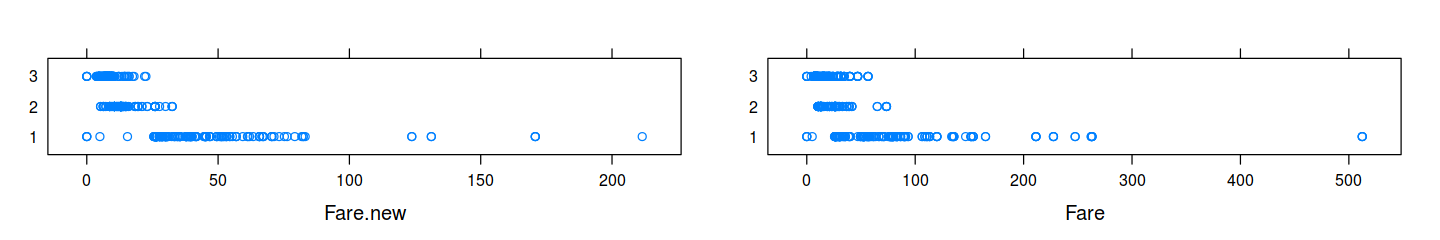

In [5]:
p1 <- stripplot(Pclass ~ Fare.new, data=train.notna)
p2 <- stripplot(Pclass ~ Fare, data=train.notna)

options(repr.plot.height= 2,repr.plot.width= 12)
grid.arrange(p1, p2,  nrow = 1)

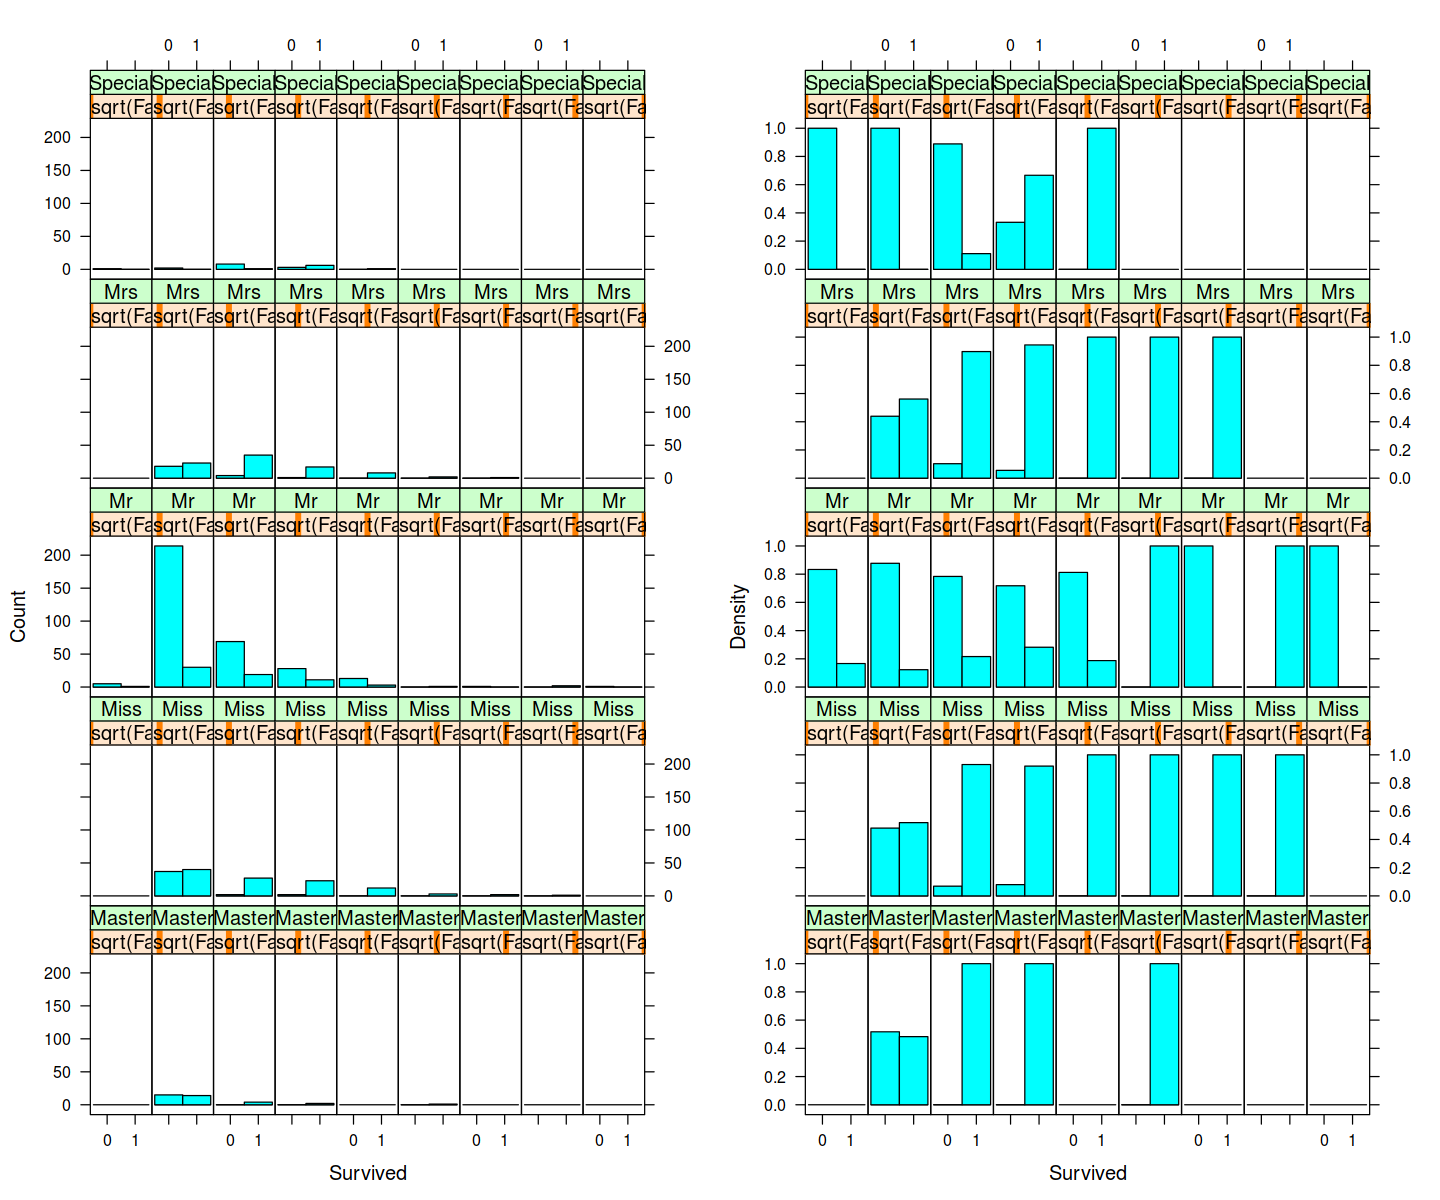

In [9]:
h3 <- histogram( ~ Survived  | as.integer(sqrt(Fare.new/3)) + Title, data = train.notna, type="count", 
          lattice.options = list(key = list(cex.title = 50)))
h4 <- histogram( ~ Survived  | as.integer(sqrt(Fare.new/3)) + Title, data = train.notna, type="density")


options(repr.plot.height= 10,repr.plot.width= 12)
grid.arrange(h3, h4,  nrow = 1)

Warning message in eval(modelRHS.vars[[i]], data, env):
“NAs introduced by coercion to integer range”Warning message in eval(modelRHS.vars[[i]], data, env):
“NAs introduced by coercion to integer range”

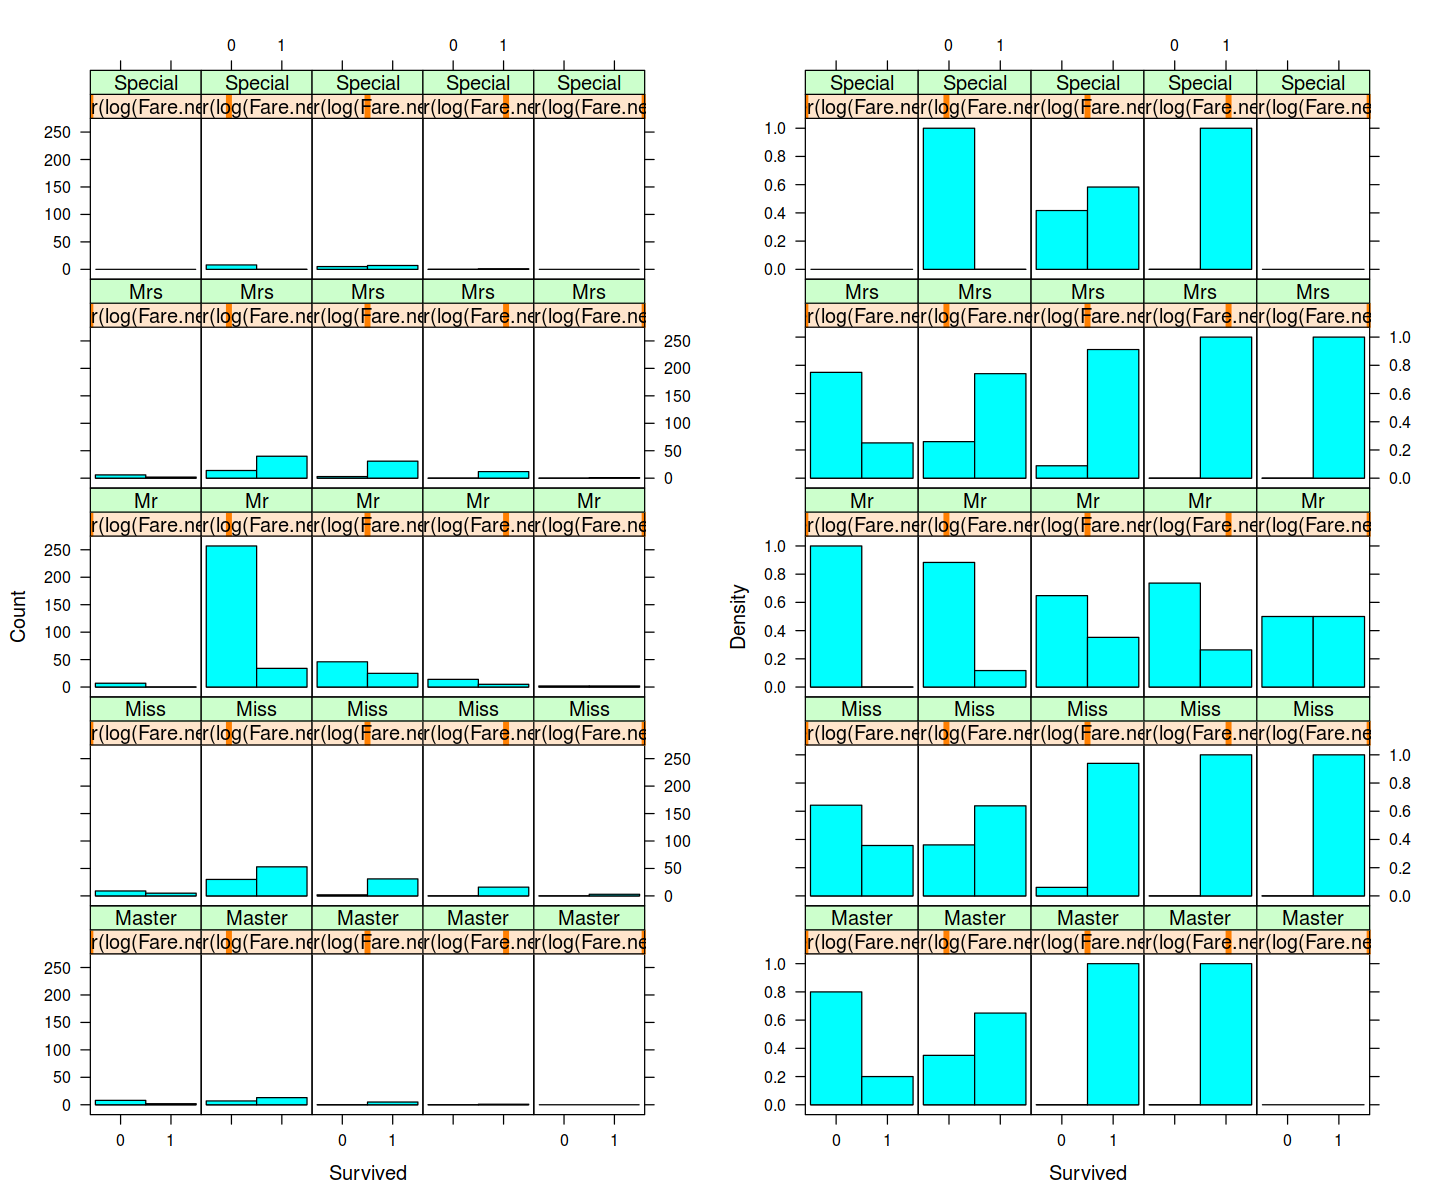

In [11]:
h3 <- histogram( ~ Survived  | as.integer(log(Fare.new*1.2)) + Title, data = train.notna, type="count", 
          lattice.options = list(key = list(cex.title = 50)))
h4 <- histogram( ~ Survived  | as.integer(log(Fare.new*1.2)) + Title, data = train.notna, type="density")


options(repr.plot.height= 10,repr.plot.width= 12)
grid.arrange(h3, h4,  nrow = 1)

# Conclusion

Calculated fare depending on number of people on ticket seems to be a much better indicator, we will use this from now on.